In [2]:
import pandas as pd


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import matplotlib.pyplot as plt

df = pd.read_csv('./smoking_driking_dataset.csv')

# shfaq te informatat per datasetin
# df.info()


# Outlier detection using Z-score
# Scatter plot
fig, ax = plt.subplots(figsize = (6,4))
#ax.scatter(df_diabetics['bmi'],df_diabetics['bp'])

# x-axis label
ax.set_xlabel('(body mass index of people)')

# y-axis label
ax.set_ylabel('(bp of the people )')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './smoking_driking_dataset.csv'

In [ ]:
# Drop columns that we don't need
columns_to_drop = ['waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'serum_creatinine', 'urine_protein']
df = df.drop(columns=columns_to_drop)

print("DataFrame after dropping columns:")
print(df)

In [ ]:
import great_expectations as gx

context = gx.get_context()

validator = context.sources.pandas_default.read_csv(
    "./smoking_driking_dataset.csv"
)

In [ ]:
validator.expect_column_values_to_be_between(column='age', min_value=20, max_value=90)


Calculating Metrics: 100%|██████████| 8/8 [00:00<00:00, 34.19it/s] 


{
  "success": true,
  "result": {
    "element_count": 991346,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [ ]:
validator.expect_column_values_to_be_in_set(column='sex', value_set=['Male', 'Female'])

Calculating Metrics: 100%|██████████| 8/8 [00:00<00:00, 26.78it/s]  


{
  "success": true,
  "result": {
    "element_count": 991346,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [ ]:
validator.expect_column_values_to_be_in_set(column='DRK_YN', value_set=['Y', 'N'])

Calculating Metrics: 100%|██████████| 8/8 [00:00<00:00, 29.56it/s]  


{
  "success": true,
  "result": {
    "element_count": 991346,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [ ]:
validator.expect_column_values_to_be_in_set(column='SMK_stat_type_cd', value_set=[1.0, 2.0,3.0])

Calculating Metrics: 100%|██████████| 8/8 [00:00<00:00, 45.92it/s]  


{
  "success": true,
  "result": {
    "element_count": 991346,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [ ]:
#DUPLICATION
duplicates = df[df.duplicated(keep='first')]
print("First occurrences of duplicates:")
print(duplicates)

First occurrences of duplicates:
           sex  age  height  weight  waistline  sight_left  sight_right  \
159911  Female   40     170      85       88.0         0.9          0.9   
175152    Male   65     170      75      101.1         0.6          0.7   
246305  Female   50     155      70       90.8         1.0          1.0   
280830    Male   45     170      75       86.4         1.2          0.7   
284528  Female   65     150      55       86.0         0.9          0.9   
290463  Female   20     160      50       70.0         1.0          1.0   
335747    Male   50     180      95      101.0         1.5          1.5   
429596    Male   75     160      60       83.0         1.2          0.7   
453451    Male   35     170      65       85.0         0.9          1.2   
471596  Female   45     165      65       82.0         1.0          1.0   
479756    Male   50     165      65       77.0         0.8          1.0   
555137    Male   30     165      95      106.3         0.7         

In [ ]:
# Removing duplicates
cleaned_df = df.drop_duplicates()

print(cleaned_df)

           sex  age  height  weight  waistline  sight_left  sight_right  \
0         Male   35     170      75       90.0         1.0          1.0   
1         Male   30     180      80       89.0         0.9          1.2   
2         Male   40     165      75       91.0         1.2          1.5   
3         Male   50     175      80       91.0         1.5          1.2   
4         Male   50     165      60       80.0         1.0          1.2   
...        ...  ...     ...     ...        ...         ...          ...   
991341    Male   45     175      80       92.1         1.5          1.5   
991342    Male   35     170      75       86.0         1.0          1.5   
991343  Female   40     155      50       68.0         1.0          0.7   
991344    Male   25     175      60       72.0         1.5          1.0   
991345    Male   50     160      70       90.5         1.0          1.5   

        hear_left  hear_right    SBP  ...  LDL_chole  triglyceride  \
0             1.0         1.0

In [ ]:
# Completeness
#identifiko te dhenat null
print('te dhenat null')
df.isnull().sum()

te dhenat null


sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [ ]:
# Aggregation: Calculate average cholesterol levels for each smoking category
agg_result = df.groupby('SMK_stat_type_cd').agg({
    'tot_chole': 'mean',
    'HDL_chole': 'mean',
    'LDL_chole': 'mean',
    'triglyceride': 'mean'
}).reset_index()

# Display the aggregated result
print("\nAggregated Result:")
print(agg_result)


Aggregated Result:
   SMK_stat_type_cd   tot_chole  HDL_chole   LDL_chole  triglyceride
0               1.0  195.336906  59.258090  113.364130    115.055730
1               2.0  194.951243  53.824900  112.836686    147.418752
2               3.0  196.672154  52.945241  112.282888    167.759654


In [ ]:
agg_result = df.groupby(['SMK_stat_type_cd', 'sex']).agg({
    'tot_chole': 'mean',
    'HDL_chole': 'mean',
    'LDL_chole': 'mean',
    'triglyceride': 'mean'
}).reset_index()

# Display the aggregated result
print("\nAggregated Result:")
print(agg_result)


Aggregated Result:
   SMK_stat_type_cd     sex   tot_chole  HDL_chole   LDL_chole  triglyceride
0               1.0  Female  196.580816  61.537431  113.562112    107.901414
1               1.0    Male  192.030307  53.199076  112.837850    134.073548
2               2.0  Female  194.460862  64.006408  108.392475    111.600110
3               2.0    Male  194.983899  53.146890  113.132636    149.803997
4               3.0  Female  195.129801  62.922021  107.716950    126.038282
5               3.0    Male  196.798908  52.125322  112.658129    171.188426


In [ ]:
bins = [20, 40, 60, 80, 100]
labels = ['20-40', '40-60', '60-80', '80-100']
df['Age_Binned'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

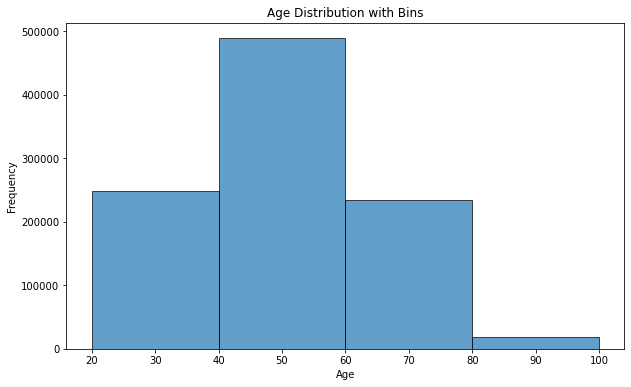

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=bins, edgecolor='black', alpha=0.7)
plt.title('Age Distribution with Bins')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
bins = [80, 90, 100, 110]
labels = ['Low', 'Normal', 'High']
cleaned_df['BLDS_Category'] = pd.cut(cleaned_df['BLDS'], bins=bins, labels=labels, right=False)


# Display the DataFrame after discretization
print("DataFrame after Discretization:")
print(cleaned_df)